# Demo FAC_TMS_2F (dual spacecraft)

> Authors: Ashley Smith
>
> Abstract: Access to the field aligned currents evaluated by the dual satellite method (level 2 product).

See also:

 - https://github.com/smithara/viresclient_examples/blob/master/basic_FAC.ipynb
 - https://github.com/pacesm/jupyter_notebooks/blob/master/Periodic%20Axis.ipynb

In [1]:
# %load_ext watermark
# %watermark -i -v -p viresclient,pandas,xarray,matplotlib

In [2]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

request = SwarmRequest()

## FAC_TMS_2F product information

This is derived from data from both Swarm Alpha and Charlie by the Ampère's integral method

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#FAC_TMS_2F
- https://earth.esa.int/documents/10174/1514862/Swarm-L2-FAC-Dual-Product-Description

### Check what "FAC" data variables are available

NB: these are the same as in the `FACxTMS_2F` single-satellite FAC product

In [3]:
# request.available_collections("FAC", details=False)

In [4]:
request.available_measurements("FAC")

['IRC',
 'IRC_Error',
 'FAC',
 'FAC_Error',
 'Flags',
 'Flags_F',
 'Flags_B',
 'Flags_q']

## Fetch one day

Also fetch the quasidipole (QD) coordinates at the same time.

In [5]:
request.set_collection("SW_OPER_FAC_TMS_2F")
request.set_products(
    measurements=["FAC", "FAC_Error", 
                  "Flags", "Flags_F", "Flags_B", "Flags_q"],
    auxiliaries=["QDLat", "QDLon"],
)
data = request.get_between(
    dt.datetime(2016,1,1),
    dt.datetime(2016,1,2)
)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (7.005MB)


In [6]:
data.sources

['SW_OPER_FAC_TMS_2F_20160101T000000_20160101T235959_0301']

Load as a pandas dataframe:

In [7]:
df = data.as_dataframe()
df.head()

,Spacecraft,Latitude,Longitude,Radius,FAC,FAC_Error,Flags,Flags_F,Flags_B,Flags_q,QDLat,QDLon
2016-01-01 00:00:00.500,-,-72.499886,93.510969,6.833866e+06,0.056039,0.039585,0,22222224,2,404,-81.280106,104.292351
2016-01-01 00:00:01.500,-,-72.563053,93.539665,6.833867e+06,0.045774,0.039720,0,22222224,2,404,-81.314735,103.952469
2016-01-01 00:00:02.500,-,-72.626215,93.568595,6.833868e+06,0.036761,0.039856,0,22222224,2,404,-81.349075,103.609985
2016-01-01 00:00:03.500,-,-72.689371,93.597757,6.833869e+06,0.030307,0.039994,0,22222224,2,404,-81.383125,103.264832
2016-01-01 00:00:04.500,-,-72.752521,93.627157,6.833871e+06,0.025611,0.040132,0,22222224,2,404,-81.416862,102.917107


Depending on your application, you should probably do some filtering according to each of the flags. This can be done on the dataframe here, or beforehand on the server using [`request.set_range_filter()`](https://viresclient.readthedocs.io/en/v0.2.4/api.html#viresclient.SwarmRequest.set_range_filter). See https://earth.esa.int/documents/10174/1514862/Swarm-L2-FAC-Dual-Product-Description for more about the data

Load as xarray dataset (we will use this instead of the pandas dataframe)

In [8]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:     (Timestamp: 86400)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T00:00:00.500000 ... 2016-01-01T23:59:59.500000
Data variables:
    Spacecraft  (Timestamp) <U1 '-' '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Latitude    (Timestamp) float64 -72.5 -72.56 -72.63 ... 31.55 31.61 31.68
    Longitude   (Timestamp) float64 93.51 93.54 93.57 ... -94.65 -94.65 -94.65
    Radius      (Timestamp) float64 6.834e+06 6.834e+06 ... 6.823e+06 6.823e+06
    FAC         (Timestamp) float64 0.05604 0.04577 ... -0.009526 -0.009135
    FAC_Error   (Timestamp) float64 0.03958 0.03972 0.03986 ... 0.01702 0.01702
    Flags       (Timestamp) uint32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    Flags_F     (Timestamp) uint32 22222224 22222224 ... 22222224 22222224
    Flags_B     (Timestamp) uint32 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2
    Flags_q     (Timestamp) uint32 404 404 404 404 404 404 404 ... 0 0 0 0 0 0 0
    QDLat       (Timestamp) float64 -81.28 -81.31 -81.35 ... 41.34 41.4 41.47
    QDLon       (Timestamp) float64 104.3 104.0 103.6 ... -23.92 -23.92 -23.92
Attributes:
    Sources:         ['SW_OPER_FAC_TMS_2F_20160101T000000_20160101T235959_0301']
    MagneticModels:  []
    RangeFilters:    []

### Plot the time series

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


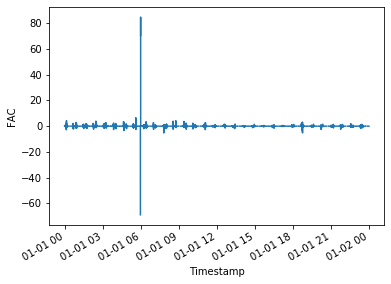

In [9]:
ds["FAC"].plot(x="Timestamp");

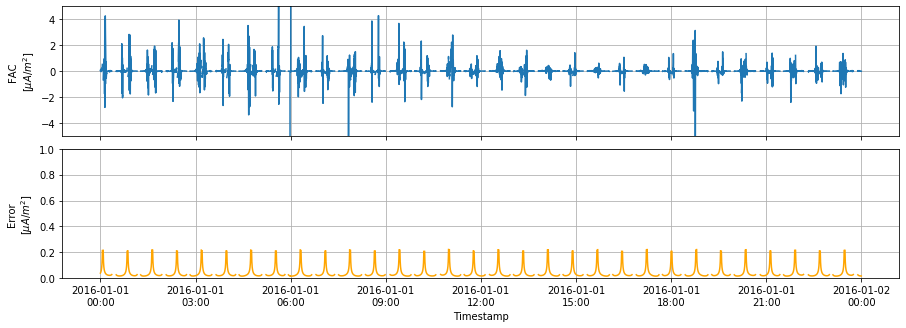

In [10]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15,5))
axes[0].plot(ds["Timestamp"], ds["FAC"])
axes[1].plot(ds["Timestamp"], ds["FAC_Error"], color="orange")
axes[0].set_ylabel("FAC\n[$\mu A / m^2$]");
axes[1].set_ylabel("Error\n[$\mu A / m^2$]");
axes[1].set_xlabel("Timestamp");
date_format = mdates.DateFormatter('%Y-%m-%d\n%H:%M')
axes[1].xaxis.set_major_formatter(date_format)
axes[0].set_ylim(-5, 5);
axes[1].set_ylim(0, 1);
axes[0].set_xticklabels([])
axes[0].grid(True)
axes[1].grid(True)
fig.subplots_adjust(hspace=0.1)

Note that the errors are lower than with the single satellite product

## "2D" plotting of two weeks using periodic axes

### Identify a stormy period between 2016.0 and 2018.0

In [11]:
# Fetch Dst over this period
# NB this is just a convenient way to fetch Dst in this notebook
#    Not really a good way to do it in general
start_time = dt.datetime(2016,1,1)
end_time = dt.datetime(2018,1,1)
request = SwarmRequest()
request.set_collection("SW_OPER_FAC_TMS_2F")
request.set_products(
    measurements=[],
    auxiliaries=["Dst"],
    sampling_step="PT120M"
)
ds_dst = request.get_between(start_time, end_time).as_xarray()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:32, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.465MB)


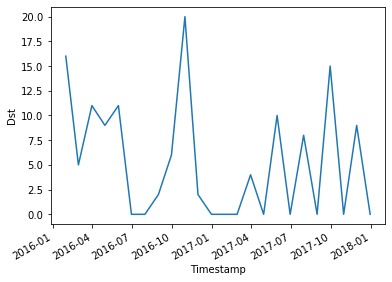

In [12]:
# Count the occurences of Dst < -50 nT each month
ds_dst["Dst"].where(ds_dst["Dst"]<-50).resample({"Timestamp": "1m"}).count().plot();

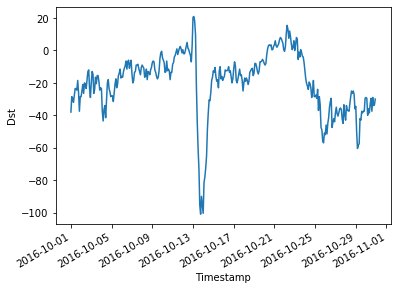

In [13]:
# Plot Dst from that peak month to then choose a two-week period from it
ds_dst["Dst"].sel({"Timestamp": slice("2016-10-01","2016-10-30")}).plot();

### Fetch the data from the chosen time period

In [14]:
start_time = dt.datetime(2016,10,9)
## If you want an exact number of days:
end_time = start_time + dt.timedelta(days=14)

request = SwarmRequest()
request.set_collection("SW_OPER_FAC_TMS_2F")
request.set_products(
    measurements=["FAC", "Flags"],
    auxiliaries=["QDLat", "QDLon", "MLT",
                 "OrbitNumber", "QDOrbitDirection"],
    sampling_step="PT10S"
)
data = request.get_between(start_time, end_time)
ds = data.as_xarray()
# NB OrbitNumber is not available for the dual satellite product because it is ambiguous
ds

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (8.356MB)


<xarray.Dataset>
Dimensions:     (Timestamp: 120960)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-10-09T00:00:00.500000 ... 2016-10-22T23:59:50.500000
Data variables:
    Spacecraft  (Timestamp) <U1 '-' '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Latitude    (Timestamp) float64 87.29 87.34 87.23 ... -43.95 -43.31 -42.67
    Longitude   (Timestamp) float64 -36.08 -22.38 -9.023 ... -136.8 -136.7
    Radius      (Timestamp) float64 6.811e+06 6.811e+06 ... 6.829e+06 6.829e+06
    FAC         (Timestamp) float64 nan nan nan ... -0.01495 -0.02332 -0.02312
    Flags       (Timestamp) uint32 104400000 104400000 ... 4400000 4400000
    QDLat       (Timestamp) float64 85.08 84.5 83.91 ... -40.13 -39.53 -38.93
    QDLon       (Timestamp) float64 144.4 143.1 142.1 ... -51.6 -51.9 -52.21
    MLT         (Timestamp) float64 4.91 4.828 4.761 4.706 ... 15.83 15.81 15.8
Attributes:
    Sources:         ['SW_OPER_FAC_TMS_2F_20161009T000000_20161009T235959_030...
    MagneticModels:  []
    RangeFilters:    []

### Complex plotting setup (experimental)

In [15]:
# Functions to produce periodic axes
# Source: https://github.com/pacesm/jupyter_notebooks/blob/master/Periodic%20Axis.ipynb
from matplotlib import pyplot as plt
from numpy import mod, arange, floor_divide, asarray, concatenate, empty, array
from itertools import chain
import matplotlib.cm as cm
from matplotlib.colors import Normalize, LogNorm, SymLogNorm
from matplotlib.colorbar import ColorbarBase

class PeriodicAxis(object):
    def __init__(self, period=1.0, offset=0):
        self.period = period
        self.offset = offset

    def _period_index(self, x):
        return floor_divide(x - self.offset, self.period)
    
    def periods(self, offset, size):
        return self.period * arange(self._period_index(offset), self._period_index(offset + size) + 1)
        
    def normalize(self, x):
        return mod(x - self.offset, self.period) + self.offset

# def periodic_plot(pax, x, y, xmin, xmax, *args, **kwargs):
#     xx = pax.normalize(x)
#     for period in pax.periods(xmin, xmax - xmin):
#         plt.plot(xx + period, y, *args, **kwargs)
#     plt.xlim(xmin, xmax)
    
# def periodic_xticks(pax, xmin, xmax, ticks, labels=None):
#     ticks = asarray(ticks)
#     labels = labels or ticks
#     ticks_locations = concatenate([
#         ticks + period
#         for period in pax.periods(xmin, xmax - xmin)
#     ])
#     ticks_labels = list(chain.from_iterable(
#         labels for _ in pax.periods(xmin, xmax - xmin)
#     ))
#     plt.xticks(ticks_locations, ticks_labels)
#     plt.xlim(xmin, xmax)

class PeriodicLatitudeAxis(PeriodicAxis):
    def __init__(self, period=360, offset=-270):
        super().__init__(period, offset)
    
    def periods(self, offset, size):
        return self.period * arange(self._period_index(offset), self._period_index(offset + size) + 1)
        
    def normalize(self, x):
        return mod(x - self.offset, self.period) + self.offset

def periodic_latscatter(pax, x, y, ymin, ymax, *args, **kwargs):
    yy = pax.normalize(y)
    xmin = kwargs.pop("xmin")
    xmax = kwargs.pop("xmax")
    for period in pax.periods(xmin, xmax - xmin):
        plt.scatter(x, yy + period, *args, **kwargs)
    plt.ylim(ymin, ymax)

def periodic_yticks(pax, ymin, ymax, ticks, labels=None):
    ticks = asarray(ticks)
    labels = labels or ticks
    ticks_locations = concatenate([
        ticks + period
        for period in pax.periods(ymin, ymax - ymin)
    ])
    ticks_labels = list(chain.from_iterable(
        labels for _ in pax.periods(ymin, ymax - ymin)
    ))
    plt.yticks(ticks_locations, ticks_labels)
    plt.ylim(ymin, ymax)

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:1206: RuntimeWarning: invalid value encountered in multiply
  a[~masked] *= self._linscale_adj


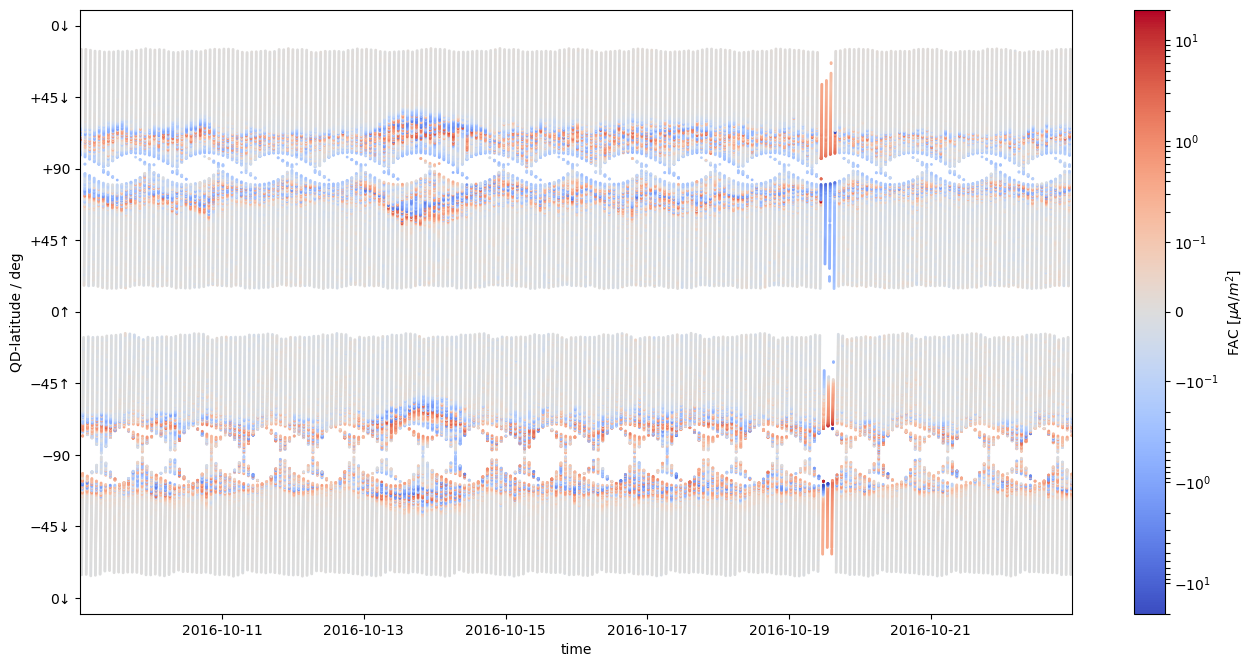

In [16]:
def fac_overview_plot(ds):

    fig, axes = plt.subplots(figsize=(16, 8), dpi=100)

    tmp1 = array(ds['QDLat'][1:])
    tmp0 = array(ds['QDLat'][:-1])
    pass_flag = tmp1 - tmp0
    latitudes = tmp0
    times = array(ds['Timestamp'][:-1])
    values = array(ds['FAC'][:-1])

    # # Subsample data
    # pass_flag = pass_flag[::10]
    # latitudes = latitudes[::10]
    # times = times[::10]
    # values = values[::10]

    plotted_latitudes = array(latitudes)
    descending = pass_flag < 0
    plotted_latitudes[descending] = -180 - latitudes[descending]

    vmax = 20
    plax = PeriodicLatitudeAxis()
    periodic_latscatter(
        plax, times, plotted_latitudes, -190, 190, 
        xmin=-360-90, xmax=360+90, c=values, s=1,
        # https://matplotlib.org/tutorials/colors/colormapnorms.html#symmetric-logarithmic
        cmap=cm.coolwarm, norm=SymLogNorm(linthresh=0.1, linscale=1, vmin=-vmax,vmax=vmax)
    )
    cax = plt.colorbar()
    cax.ax.set_ylabel("FAC [$\mu A / m^2$]")
    plt.xlim(times.min(), times.max())
    plt.xlabel("time")
    plt.ylabel("QD-latitude / deg")

    periodic_yticks(plax, -190, +190, [-225, -180, -135, -90, -45,  0, 45,  90], labels=[
        '+45\u2193', '0\u2193', '\u221245\u2193', '\u221290', '\u221245\u2191', '0\u2191', '+45\u2191', '+90'
    ])
    return fig, axes

fac_overview_plot(ds);

In [17]:
# Maximum values for FAC indicate saturation of the colorbar
ds["FAC"].max(), ds["FAC"].min()

(<xarray.DataArray 'FAC' ()>
 array(65.0556342), <xarray.DataArray 'FAC' ()>
 array(-59.90191389))

### A few other views of the data

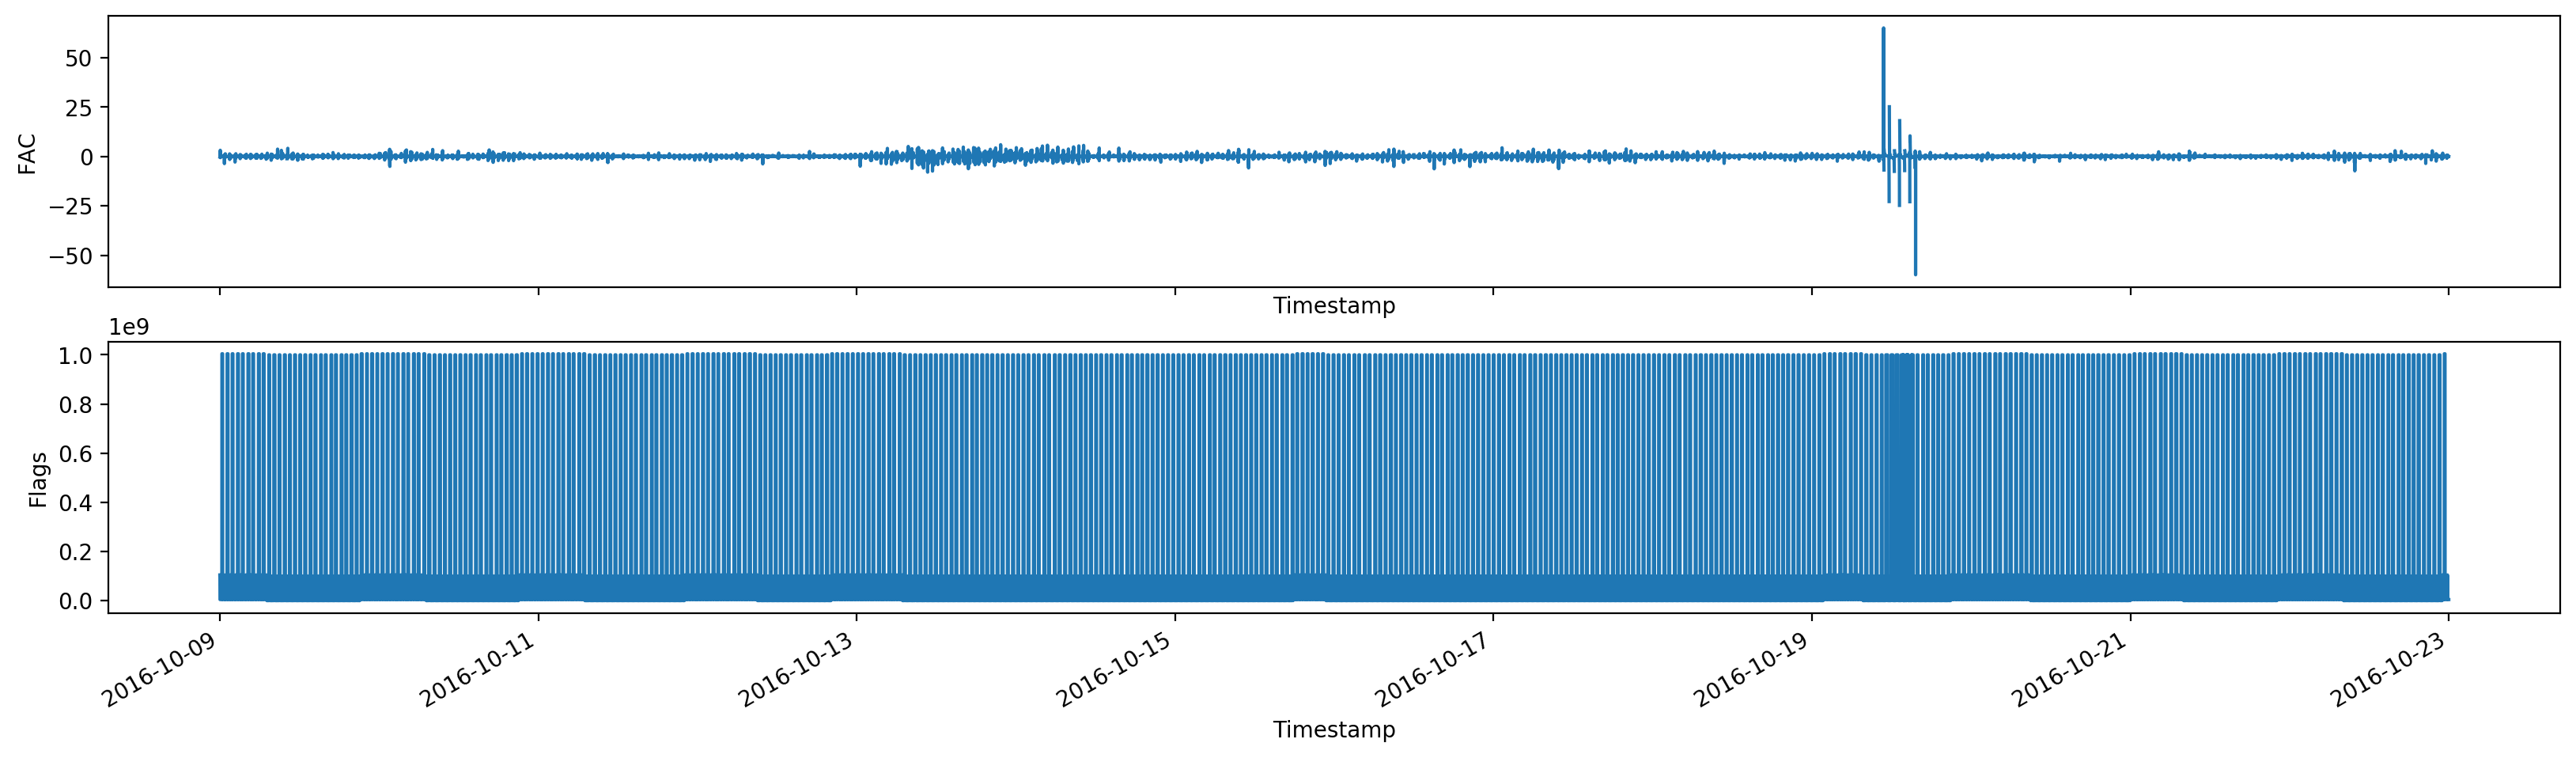

In [18]:
# Flags indicate something wrong around 2016-10-19
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(20,5), dpi=200)
ds["FAC"].plot(ax=axes[0])
ds["Flags"].plot(ax=axes[1]);

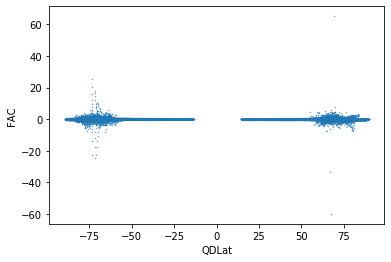

In [19]:
ds.plot.scatter(y="FAC", x="QDLat", s=0.1);

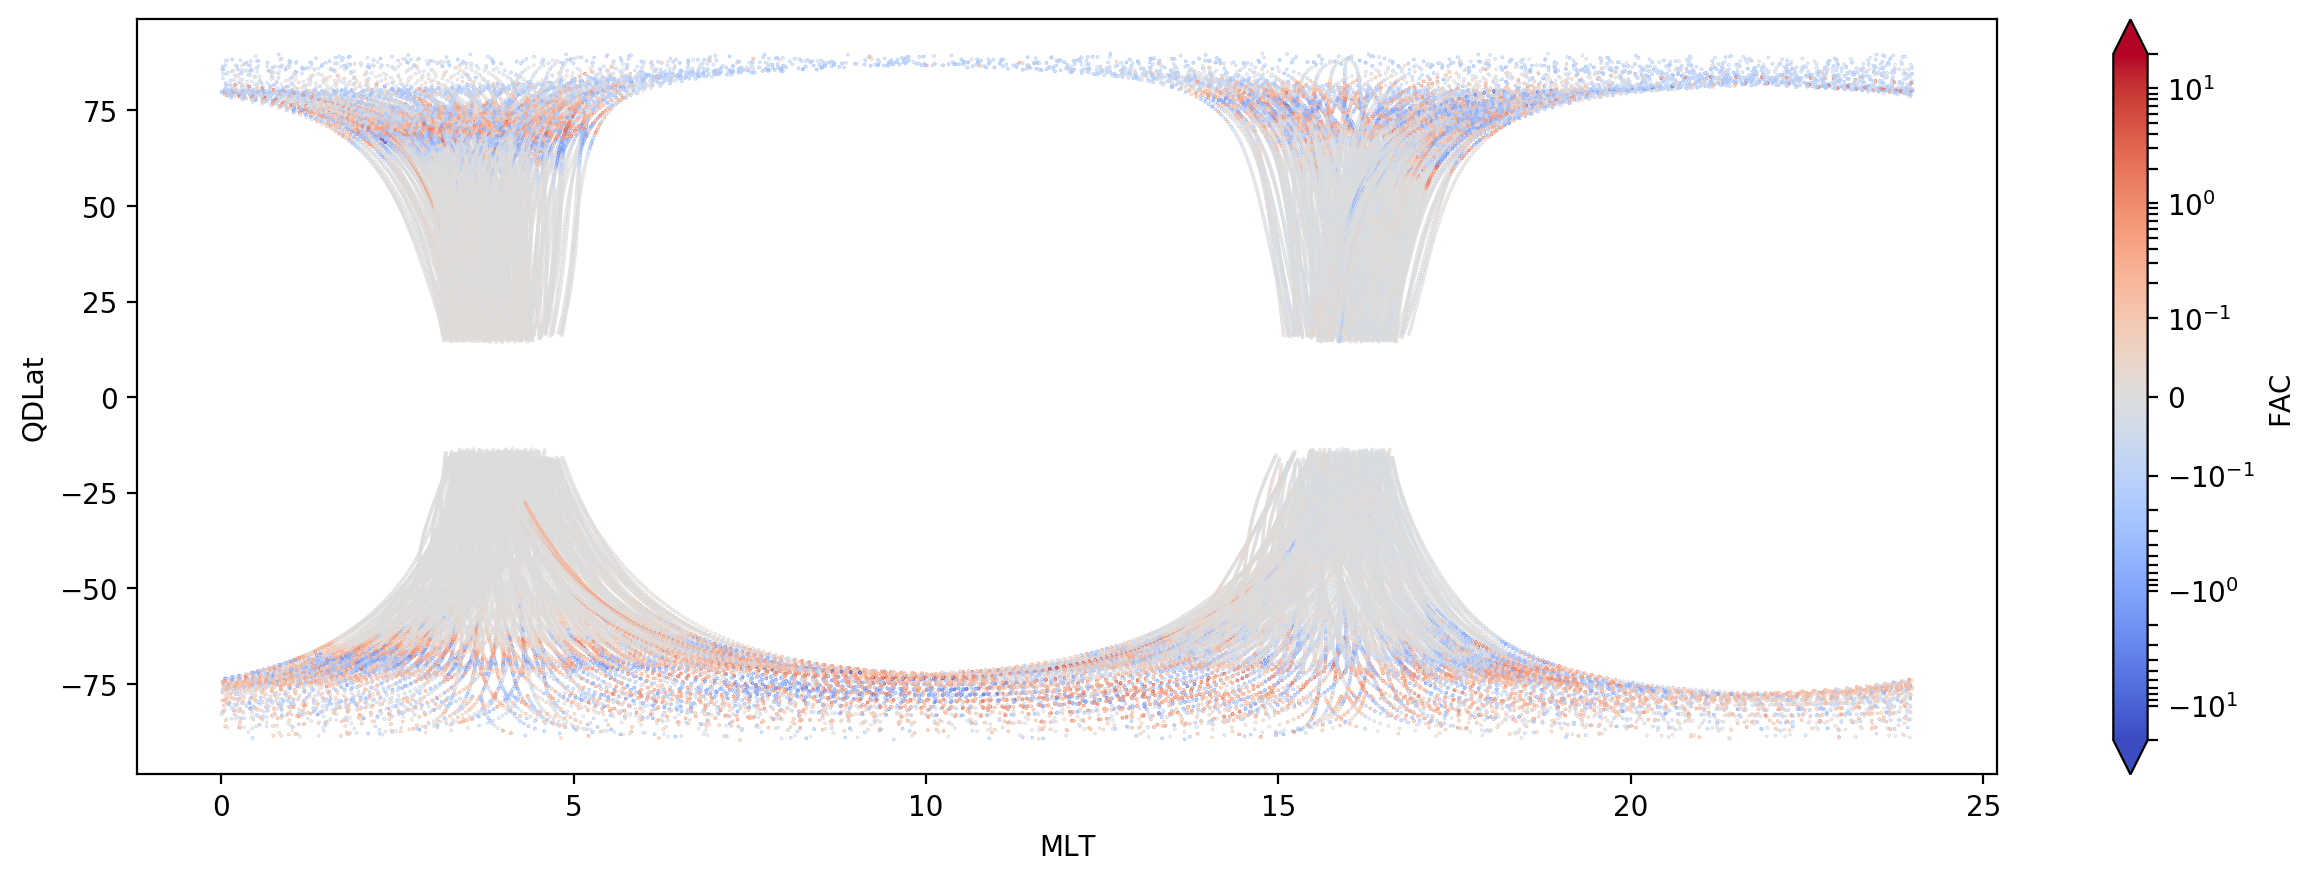

In [20]:
fig, ax = plt.subplots(figsize=(15,5), dpi=200)
ds.plot.scatter(
    ax=ax,
    x="MLT", y="QDLat", hue="FAC", cmap=cm.coolwarm, s=0.1,
    norm=SymLogNorm(linthresh=0.1, linscale=1, vmin=-20, vmax=20),
);

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:06, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (8.963MB)


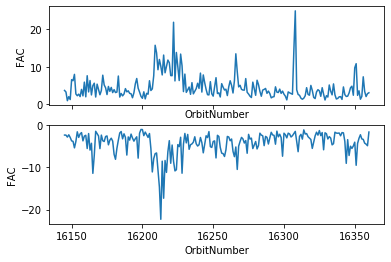

In [21]:
# Plotting the maximum FAC encountered on each orbit
# Do this with the single satellite product instead for now
#  so that we can quickly use the OrbitNumber parameter
#  which is not available for the dual-sat product
# You could achieve this by generating a flag based on
#  zero-crossings of Latitude
start_time = dt.datetime(2016,10,9)
end_time = start_time + dt.timedelta(days=14)
request = SwarmRequest()
request.set_collection("SW_OPER_FACATMS_2F")
request.set_products(
    measurements=["FAC", "Flags"],
    auxiliaries=["QDLat", "QDLon", "MLT",
                 "OrbitNumber", "QDOrbitDirection"],
    sampling_step="PT10S"
)
data = request.get_between(start_time, end_time)
ds = data.as_xarray()
fig, axes = plt.subplots(nrows=2, sharex=True)
ds.groupby("OrbitNumber").max()["FAC"].plot(ax=axes[0])
ds.groupby("OrbitNumber").min()["FAC"].plot(ax=axes[1]);